# Black Friday Purchases

## Objective

This notebook seeks to examine customer purchasing behavior, particularly focusing on purchase amounts, in relation to customer gender and other relevant factors. The goal is to provide insights that will assist the management team at Walmart Inc. in understanding potential differences in spending habits between male and female customers, thereby facilitating informed decision-making.

Do women spend more on Black Friday than men?

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [2]:
walmart_df = pd.read_csv('walmart_data.csv')

### Data Overview

Here, we'll begin by examining the Walmart dataset. We'll review the first and last few rows of the dataset to gain an understanding of its structure and contents.

In [3]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
walmart_df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


We will also check to see how many rows and columns there are, what types of data we have, and what each column is called

In [5]:
# Shape of the dataframe
walmart_df.shape

(550068, 10)

In [6]:
# Name of each column in dataframe
walmart_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [7]:
# Datatpe of each column in dataframe
walmart_df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

### Finding Unique Values and Count them

Next, we'll determine the unique values present in each column of the dataset. This step will provide insight into the diversity and range of data within each column, aiding our understanding of the dataset's composition.

In [10]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\nUnique Values of {column}:", unique_values)

print_unique_values(walmart_df)


Unique Values of User_ID: [1000001 1000002 1000003 ... 1004113 1005391 1001529]

Unique Values of Product_ID: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Unique Values of Gender: ['F' 'M']

Unique Values of Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Unique Values of Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Unique Values of City_Category: ['A' 'C' 'B']

Unique Values of Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']

Unique Values of Marital_Status: [0 1]

Unique Values of Product_Category: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Unique Values of Purchase: [ 8370 15200  1422 ...   135   123   613]


Additionally, we'll count the number of unique values in each column of the dataset. This quantitative measure will complement our understanding of the data's diversity, providing valuable information about the distinct categories or ranges present within each column.

In [13]:
def print_nunique_values(df):
    for column in df.columns:
        unique_values = df[column].nunique()
        print(f'\nUnique Values of {column}:', unique_values)
        
print_nunique_values(walmart_df)


Unique Values of User_ID: 5891

Unique Values of Product_ID: 3631

Unique Values of Gender: 2

Unique Values of Age: 7

Unique Values of Occupation: 21

Unique Values of City_Category: 3

Unique Values of Stay_In_Current_City_Years: 5

Unique Values of Marital_Status: 2

Unique Values of Product_Category: 20

Unique Values of Purchase: 18105


### Data Cleaning

Before making adjustments to the 'Stay_In_Current_City_Years' column, let's first examine its unique values to understand the range and distribution of data within this column.

In [14]:
walmart_df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
# Removing the '+' symbol
walmart_df['Stay_In_Current_City_Years'] = walmart_df['Stay_In_Current_City_Years'].str.replace("+","")

In [16]:
walmart_df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [17]:
# Changing the data type 
walmart_df['Stay_In_Current_City_Years'] = pd.to_numeric(walmart_df['Stay_In_Current_City_Years'])

### Statistical Summary

Before analyzing the statistics of the data, we'll first select the numerical data types to focus on. This step will ensure that we are examining relevant metrics such as mean, standard deviation, minimum, and maximum values, providing valuable insights into the distribution and range of the numerical data within the dataset.

In [19]:
walmart_df.select_dtypes(include=['int64']).skew()

User_ID                       0.003066
Occupation                    0.400140
Stay_In_Current_City_Years    0.317236
Marital_Status                0.367437
Product_Category              1.025735
Purchase                      0.600140
dtype: float64

In [20]:
walmart_df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068.000000,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,3.000000,1.000000,8.000000,12054.000000


### Observations from Analysis

- There are no missing values in data
- Customers with `age` group `26-35` have made more purchases (`219,587`) compared to other groups
- Customers in `City_Category` of `B` have done more purchases (`231,173`) compared with other `City_Category`)
- Out of 550,000 data points. 414,259's `gender` is Male and the rest are Female.
- Customer with Minimum amount of `Purchase` is 12
- Customer with Maximum amount of `Purchase` is 23,961
- `Purchase` might have outliers

### Missing Value Detection

Let's examine whether there are any missing values in our dataset. Missing values can impact our analysis, so it's crucial to identify and address them.

In [25]:
# Missing value check
walmart_df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

### Duplicate Value Detection

We'll also search for any duplicate entries in the dataset. Duplicate entries can distort our analysis, so it's important to detect and address them appropriately.

In [26]:
# Checking for duplicate values in the dataset
walmart_df.duplicated(subset=None, keep='first').sum()

0

## Data Visualization

First, let's do data visualization for our numerical values.

In [27]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 42.0+ MB


### Data Visualization with Numerical Features

In this section, we'll generate visual representations of the numerical data. This will involve creating graphs to illustrate the distributions of various numerical features such as occupation, years in the current city, marital status, and purchase amounts. Graphs provide a visual means to identify patterns and trends, making it easier to interpret the data compared to analyzing numbers alone.

In [28]:
[col for col in walmart_df.select_dtypes(include=['int64']).columns]

['User_ID',
 'Occupation',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category',
 'Purchase']

We can remove `User_ID` and `Product_Category`, because that won't contribute to our analysis.

The mu (mean) is 9263.968712959126 and sigma (standard deviation) is 5023.060827959928 for the curve


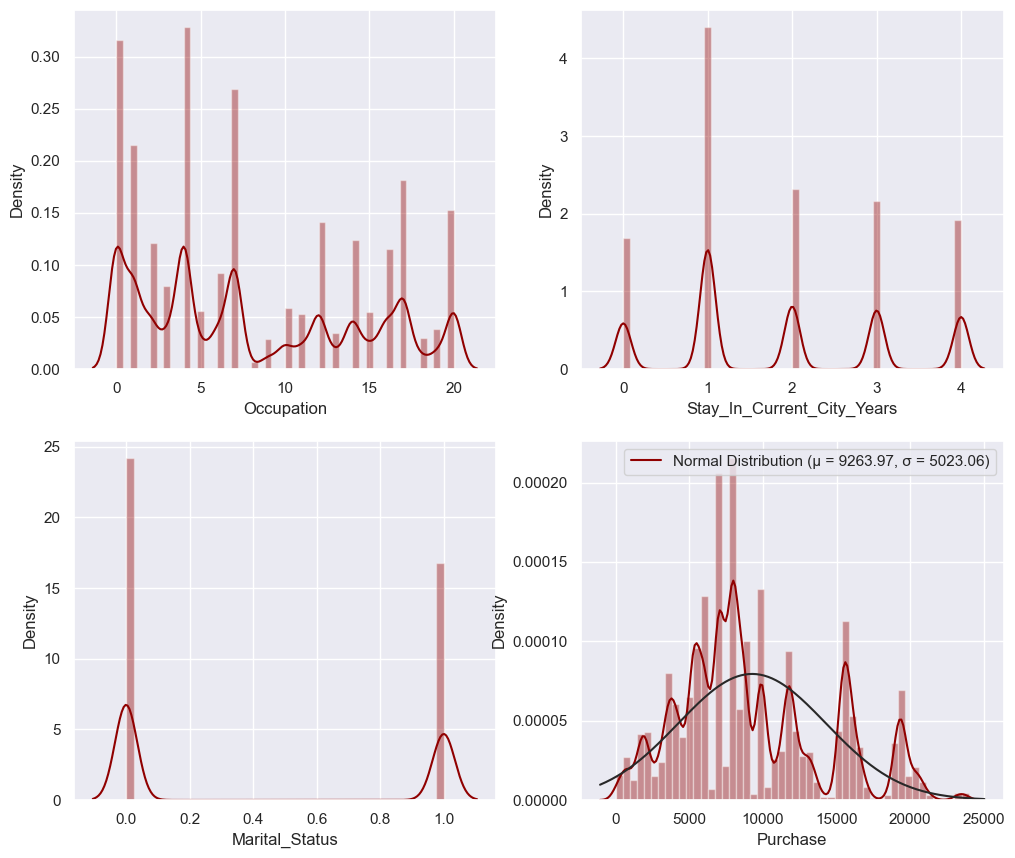

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a 2x2 grid of subplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=0.9)  # Adjust the top spacing of the subplots

# Plot distribution plots for each specified column
sns.distplot(walmart_df['Occupation'], kde=True, ax=axis[0,0], color="#900000")
sns.distplot(walmart_df['Stay_In_Current_City_Years'].astype(int), kde=True, ax=axis[0,1], color="#900000")
sns.distplot(walmart_df['Marital_Status'], kde=True, ax=axis[1,0], color="#900000")

# Plotting a distribution plot for the 'Purchase' variable with normal curve fit
sns.distplot(walmart_df['Purchase'], ax=axis[1,1], color="#900000", fit=norm)

# Fitting the target variable to the normal curve 
mu, sigma = norm.fit(walmart_df['Purchase']) 
print("The mu (mean) is {} and sigma (standard deviation) is {} for the curve".format(mu, sigma))

# Adding a legend for the 'Purchase' distribution plot
axis[1,1].legend(['Normal Distribution (μ = {:.2f}, σ = {:.2f})'.format(mu, sigma)], loc='best')

# Show the plots
plt.show()